In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,top_k_accuracy_score
import seaborn as sns

In [ ]:
import json
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/loan_prediction.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape

(4269, 13)

In [ ]:
data = data.drop('loan_id',axis=1)
data.isnull().sum() # we dont have any missing values in this dataset

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
import plotly.express as px
fig1 = px.box(
                data,
                x = ' income_annum',
                y = ' loan_status',
                color = ' loan_status',
                title = 'income_annum vs loan_status'
)
fig1.show()
# we could see that there are no outliers visible in income_annum

In [ ]:
data.shape

(4269, 12)

In [ ]:
Q1 = data[' income_annum'].quantile(0.25)
Q3 = data[' income_annum'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data[' income_annum'] >= lower_limit) & (data[' income_annum'] <= upper_limit)]

In [ ]:
data.shape #no change in shape because there are no outliers

(4269, 12)

In [ ]:
import plotly.express as px
fig2 = px.box(
                data,
                x = ' loan_amount',
                y = ' loan_status',
                color = ' loan_status',
                title = 'loan_amount vs loan_status'
)
fig2.show()
# once again looks like we didn't find any outliers in loan_amount

In [ ]:
data.shape

(4269, 12)

In [ ]:
Q1 = data[' loan_amount'].quantile(0.25)
Q3 = data[' loan_amount'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data[' loan_amount'] >= lower_limit) & (data[' loan_amount'] <= upper_limit)]

In [ ]:
data.shape #no change in shape because there are no outliers

(4269, 12)

In [ ]:
fig3 = px.box(
                data,
                x = ' residential_assets_value',
                y = ' loan_status',
                color = ' loan_status',
                title = 'residental_assets_value vs loan_status'
)
fig3.show() # we could see some outliers

In [ ]:
data.shape

(4269, 12)

In [ ]:
Q1 = data[' residential_assets_value'].quantile(0.25)
Q3 = data[' residential_assets_value'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data[' residential_assets_value'] >= lower_limit) & (data[' residential_assets_value'] <= upper_limit)]

In [ ]:
data.shape # so the records are decreased from 4269 to 4217 which mean we removed 52 outliers

(4217, 12)

In [ ]:
fig4 = px.box(
              data,
              x=' commercial_assets_value',
              y = ' loan_status',
              color = ' loan_status',
              title='commercial_assets_value vs loan_status'
              )
fig4.show() # there are few outliers

In [ ]:
data.shape

(4217, 12)

In [ ]:
Q1 = data[' commercial_assets_value'].quantile(0.25)
Q3 = data[' commercial_assets_value'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

data = data[(data[' commercial_assets_value'] >= lower_limit) & (data[' commercial_assets_value'] <= upper_limit)]

In [ ]:
data.shape # records are decreased to 4182 from 4217 which means there are 35 outliers

(4182, 12)

In [ ]:
fig5 = px.box(
              data,
              x =' luxury_assets_value',
              y = ' loan_status',
              color = ' loan_status',
              title = 'luxury_assets_value Vs loan_status'
)
fig5.show() # we could see there are no outliers

In [ ]:
fig6 = px.box(
                data,
                x =' bank_asset_value',
                y = ' loan_status',
                color = ' loan_status',
                title = 'bank_asset_value vs loan_status'
)
fig6.show() #Looks like there are few outliers

In [ ]:
data.shape

(4182, 12)

In [ ]:
Q1 = data[' bank_asset_value'].quantile(0.25)
Q3 = data[' bank_asset_value'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

data = data[(data[' bank_asset_value'] >= lower_limit) & (data[' bank_asset_value'] <= upper_limit)]

In [ ]:
data.shape # records became 4173 from 4182 so it means we removed 9 outliers

(4173, 12)

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f'Unique values in column "{column}": {unique_values}')

Unique values in column " education": [' Not Graduate' ' Graduate']
Unique values in column " self_employed": [' Yes' ' No']
Unique values in column " loan_status": [' Rejected' ' Approved']


In [ ]:
categorical_attributes = [' education',' self_employed']
data = pd.get_dummies(data,columns = categorical_attributes)

In [ ]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,False,True,False,True
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,True,False,False,True


In [ ]:
label_encoder = LabelEncoder()
data[' loan_status'] = label_encoder.fit_transform(data[' loan_status'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{' Approved': 0, ' Rejected': 1}


In [ ]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,False,True,False,True
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1,True,False,False,True


In [ ]:
label_mapping = {0: 1, 1: 0}
data[' loan_status'] = [label_mapping[label] for label in data[' loan_status']]
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,False,True,False,True
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0,True,False,False,True


In [ ]:
data.shape

(4173, 14)

In [ ]:
X = data.drop(' loan_status',axis=1)
y = data[' loan_status']

In [ ]:
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,True,False,False,True


In [ ]:
X.shape

(4173, 13)

In [ ]:
print(y.shape)
y.head()

(4173,)


,loan_status
1,0
2,0
3,0
4,0
5,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

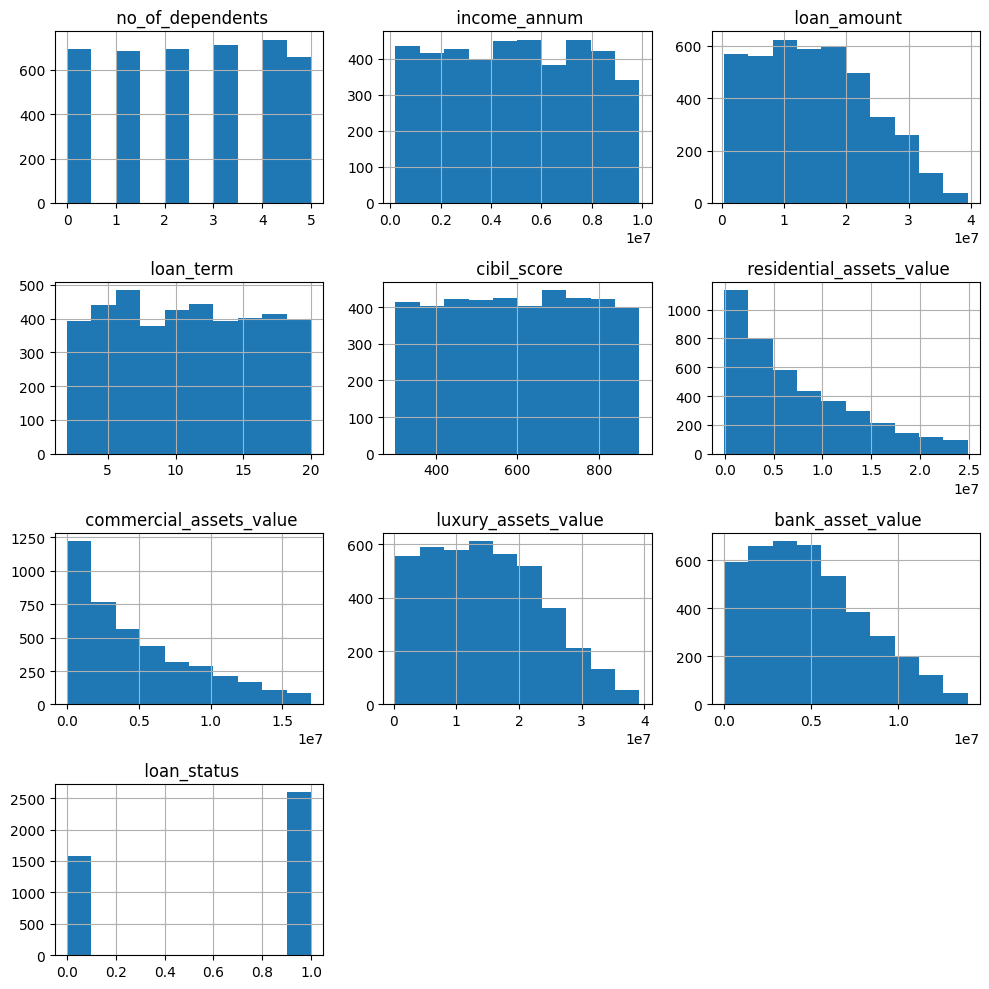

In [ ]:
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
nums = [' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']

X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

In [ ]:
X_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
2074,3,1.227026,0.281047,-0.504177,1.578001,-0.392538,0.947270,0.404404,1.630299,True,False,True,False
1096,3,0.536650,-0.033601,-0.154538,-0.315546,0.567745,1.233178,0.730024,0.085005,False,True,True,False
255,3,-1.461808,-1.382091,-0.154538,-0.648670,-1.027301,-1.149388,-1.335977,-1.365680,True,False,False,True
1486,0,-0.735096,-0.876407,-0.154538,-1.636354,-0.327434,-1.030260,-0.785792,-1.050314,False,True,True,False
1642,2,1.372369,0.472083,-1.553092,-0.268792,-0.522746,-0.696701,0.370719,2.103349,False,True,False,True


In [ ]:
X_train.shape

(3129, 13)

In [ ]:
svm = SVC(random_state=40,probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=40)

In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 0 ... 0 1 1]


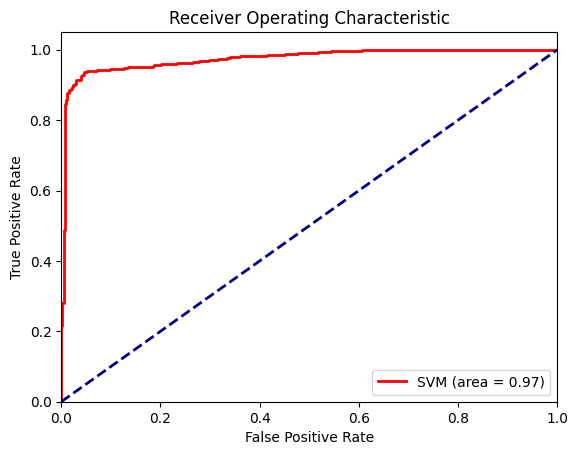

In [ ]:
# Import the auc function from sklearn.metrics along with the others:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,top_k_accuracy_score, auc

y_score_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()

# Now you can use the auc function:
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9368
Precision: 0.9540
Recall: 0.9420
F1 Score: 0.9479


In [ ]:
cm = confusion_matrix(y_test, y_pred)

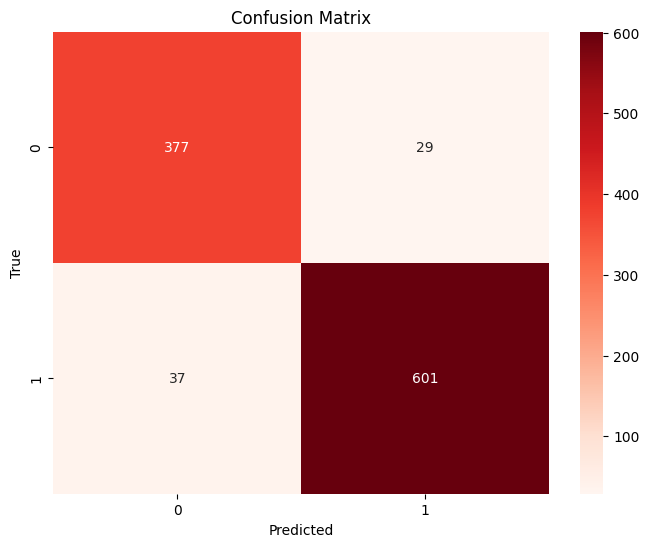

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 978 out of 1044


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.6228  (accuracy)


In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
lg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', random_state=0)

In [ ]:
y_pred = lg.predict(X_test)

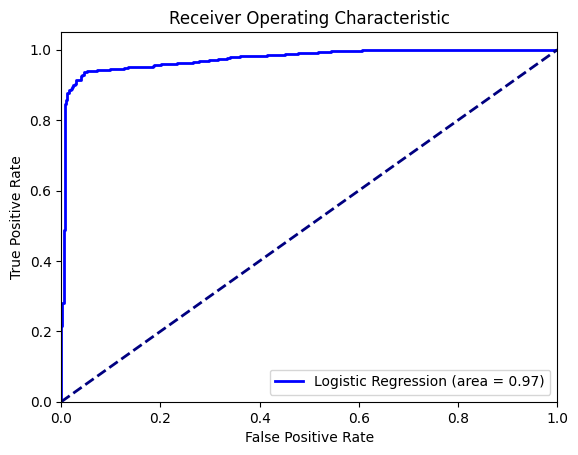

In [ ]:
y_score_lg = lg.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_lg = auc(fpr_lg, tpr_lg)
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_lg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9157
Precision: 0.9283
Recall: 0.9342
F1 Score: 0.9313


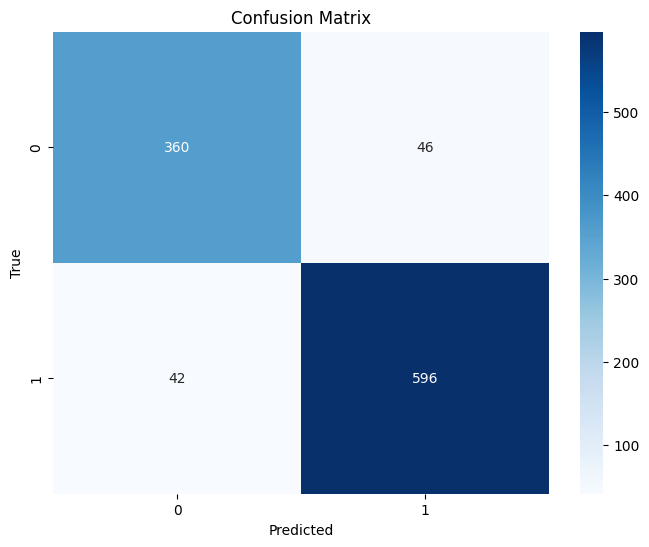

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 956 out of 1044


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_val_score(lg, X, y, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid

0.7364  (accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

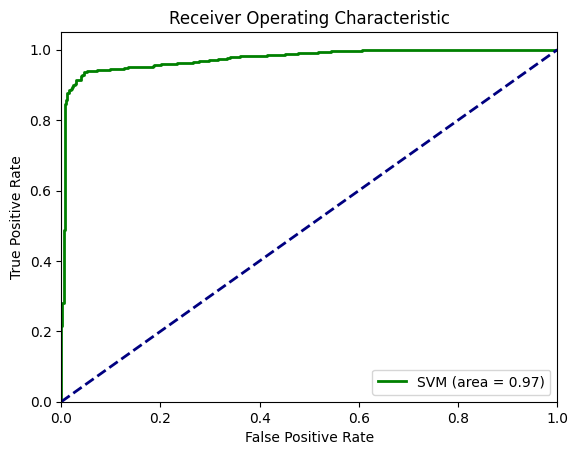

In [ ]:
y_score_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9808
Precision: 0.9905
Recall: 0.9781
F1 Score: 0.9842


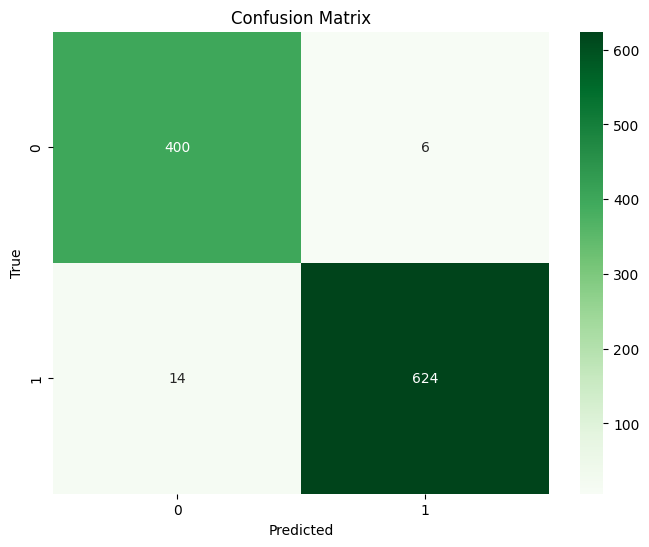

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 1024 out of 1044


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.9783  (accuracy)


In [ ]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'accuracy':[]}
k_values = [1,3,5,7,9,11,12,13,15]
for i in k_values:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Total number of correct predictions when n_neighbors is set to {i} = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")
    # print(cm)
    cr = classification_report(y_test, y_pred,output_dict = True)
    weighted_avg_metrics = cr['weighted avg']
    metrics['precision'].append(weighted_avg_metrics['precision'])
    metrics['recall'].append(weighted_avg_metrics['recall'])
    metrics['f1-score'].append(weighted_avg_metrics['f1-score'])
    acc = accuracy_score(y_test, y_pred)
    metrics['accuracy'].append(acc)

Total number of correct predictions when n_neighbors is set to 1 = 894 out of 1044
Total number of correct predictions when n_neighbors is set to 3 = 915 out of 1044
Total number of correct predictions when n_neighbors is set to 5 = 931 out of 1044
Total number of correct predictions when n_neighbors is set to 7 = 941 out of 1044
Total number of correct predictions when n_neighbors is set to 9 = 944 out of 1044
Total number of correct predictions when n_neighbors is set to 11 = 946 out of 1044
Total number of correct predictions when n_neighbors is set to 12 = 954 out of 1044
Total number of correct predictions when n_neighbors is set to 13 = 952 out of 1044
Total number of correct predictions when n_neighbors is set to 15 = 947 out of 1044


In [ ]:
for i in metrics:
  print(f"{i} : {metrics[i]}")

precision : [0.8556339684780052, 0.8762834384343114, 0.8916302888674686, 0.901298324928998, 0.9041348666116611, 0.90670252871686, 0.9160761501850874, 0.9124263364908269, 0.9071312642741214]
recall : [0.8563218390804598, 0.8764367816091954, 0.8917624521072797, 0.9013409961685823, 0.9042145593869731, 0.9061302681992337, 0.9137931034482759, 0.9118773946360154, 0.907088122605364]
f1-score : [0.8557674855184073, 0.8763525918509291, 0.8916887044895735, 0.9013187998527599, 0.9041712552406345, 0.9063305184313937, 0.9142628205128205, 0.9120653846498799, 0.9071088279510247]
accuracy : [0.8563218390804598, 0.8764367816091954, 0.8917624521072797, 0.9013409961685823, 0.9042145593869731, 0.9061302681992337, 0.9137931034482759, 0.9118773946360154, 0.907088122605364]


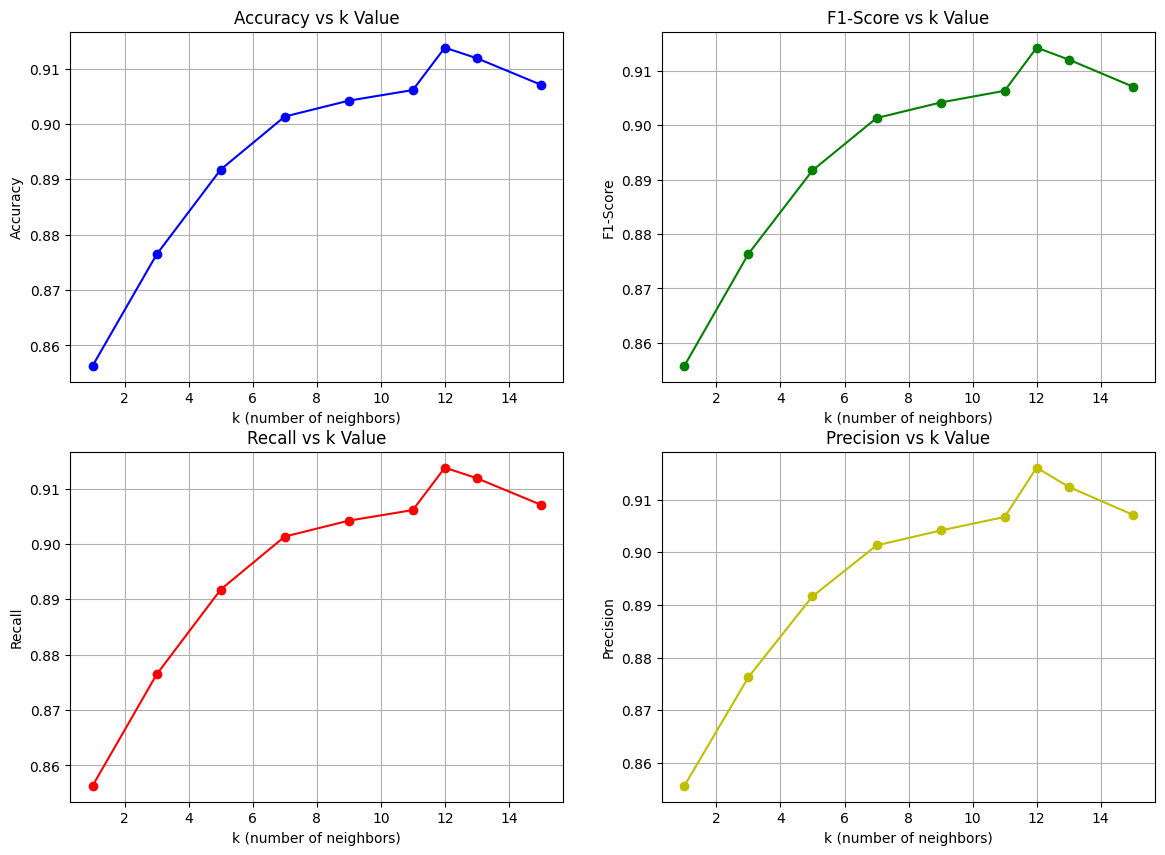

In [ ]:
# Accuracy vs k value
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(k_values, metrics['accuracy'],marker='o',color='b')
plt.title('Accuracy vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# f1-score vs k value
plt.subplot(2, 2, 2)
plt.plot(k_values, metrics['f1-score'], marker='o',color='g')
plt.title('F1-Score vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('F1-Score')
plt.grid(True)

# Recall vs k value
plt.subplot(2, 2, 3)
plt.plot(k_values, metrics['recall'], marker='o',color='r')
plt.title('Recall vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.grid(True)

# Precision vs k value
plt.subplot(2, 2, 4)
plt.plot(k_values, metrics['precision'], marker='o',color='y')
plt.title('Precision vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.grid(True)

plt.show()

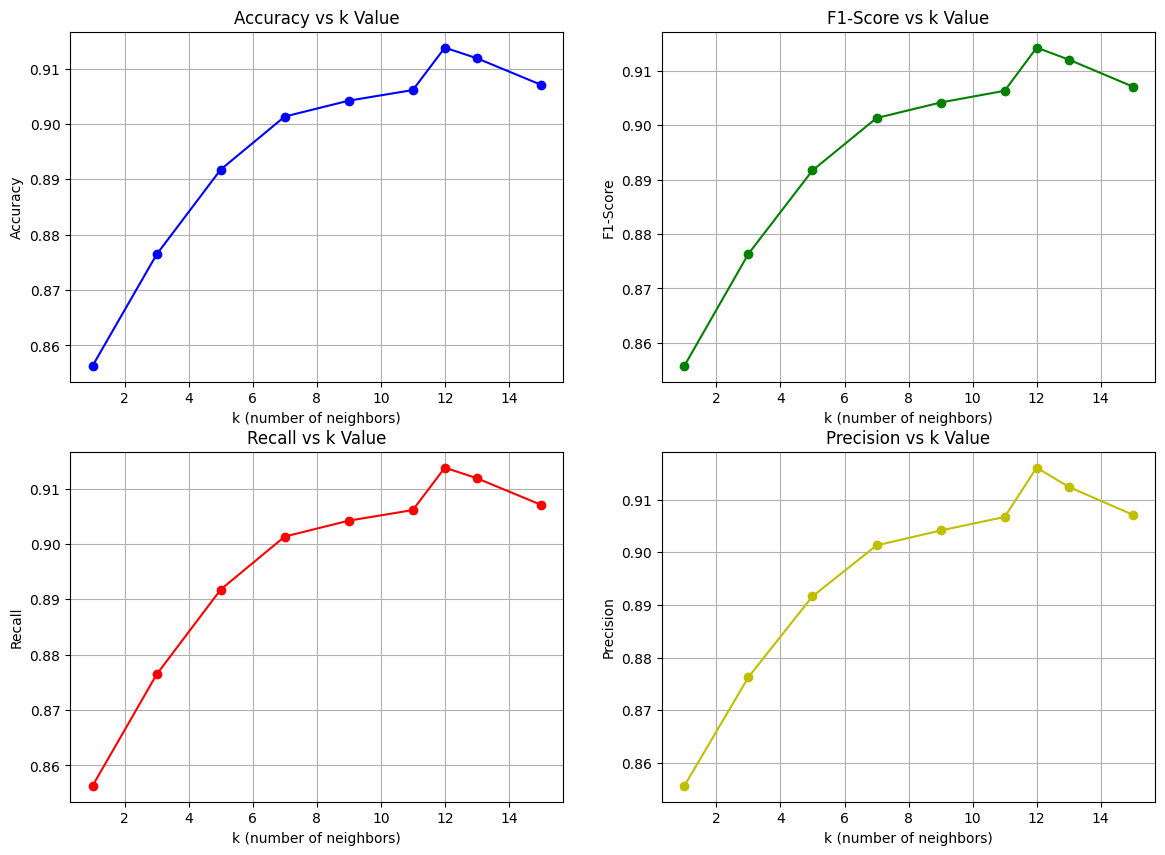

In [ ]:
# Accuracy vs k value
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(k_values, metrics['accuracy'],marker='o',color='b')
plt.title('Accuracy vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# f1-score vs k value
plt.subplot(2, 2, 2)
plt.plot(k_values, metrics['f1-score'], marker='o',color='g')
plt.title('F1-Score vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('F1-Score')
plt.grid(True)

# Recall vs k value
plt.subplot(2, 2, 3)
plt.plot(k_values, metrics['recall'], marker='o',color='r')
plt.title('Recall vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.grid(True)

# Precision vs k value
plt.subplot(2, 2, 4)
plt.plot(k_values, metrics['precision'], marker='o',color='y')
plt.title('Precision vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.grid(True)

plt.show()